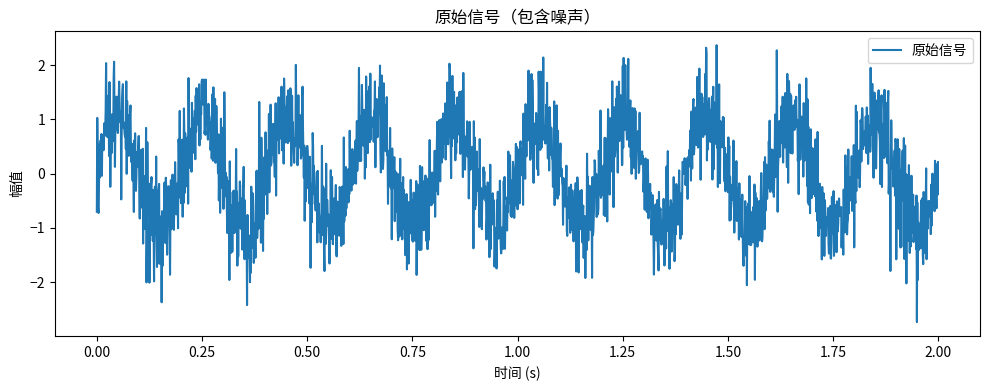

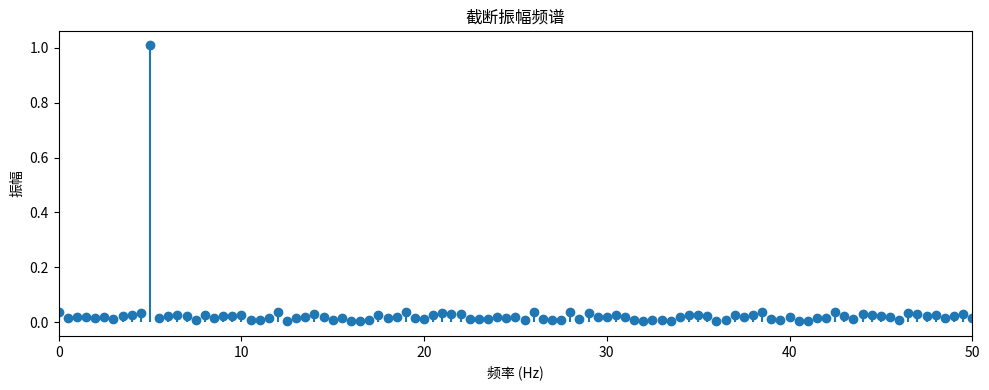

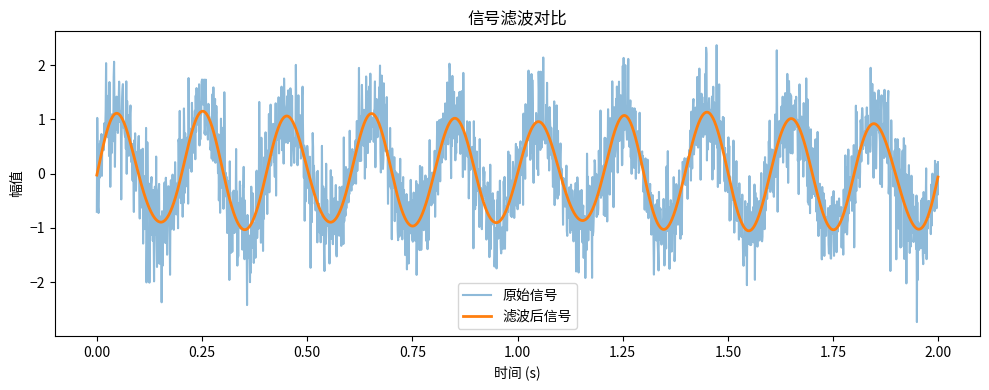

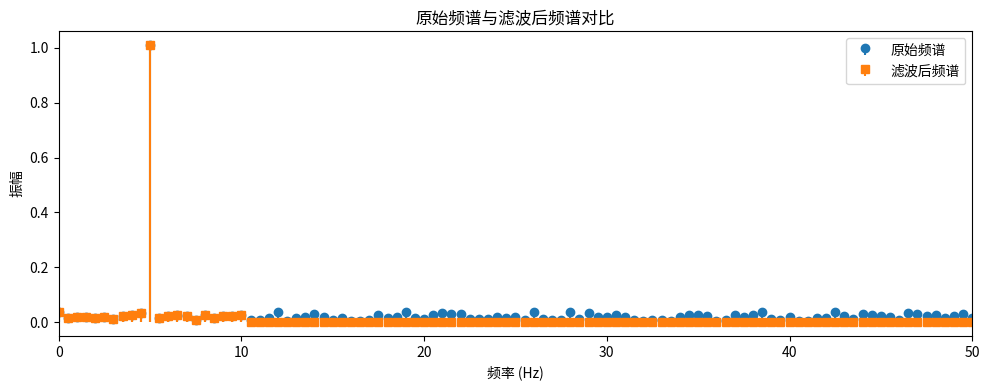

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Source Han Sans CN' # SimHei # Heiti TC


# --- 1. 生成示例信号 ---
T = 2.0                     # 信号总时长2秒
fs = 2000                   # 采样点数（采样频率）
t = np.linspace(0, T, fs, endpoint=False)  # 均匀采样，不包含 T

# 构造低频正弦信号以及高频噪声
f_low = 5                   # 低频分量，5 Hz
signal_low = np.sin(2 * np.pi * f_low * t)
noise = 0.5 * np.random.randn(len(t))
signal = signal_low + noise

plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='原始信号')
plt.xlabel("时间 (s)")
plt.ylabel("幅值")
plt.title("原始信号（包含噪声）")
plt.legend()
plt.tight_layout()
plt.show()

# --- 2. 傅里叶变换与频谱绘制 ---
fft_coeff = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal), d=T/fs)

# 取非负频率部分（对于实信号，负频率部分是镜像）
idx_positive = np.where(freqs >= 0)
freqs_pos = freqs[idx_positive]
amp_spectrum = np.abs(fft_coeff)[idx_positive] * 2 / len(signal)  # 乘2归一化（直流项除外）

plt.figure(figsize=(10, 4))
plt.stem(freqs_pos, amp_spectrum, basefmt=" ")
plt.xlabel("频率 (Hz)")
plt.ylabel("振幅")
plt.title("截断振幅频谱")
plt.xlim(0, 50)  # 只显示 0~50 Hz 部分
plt.tight_layout()
plt.show()

# --- 3. 信号滤波 ---
cutoff_freq = 10  # 截止频率10 Hz
fft_coeff_filtered = fft_coeff.copy()
fft_coeff_filtered[np.abs(freqs) > cutoff_freq] = 0

# --- 4. 信号重构与对比 ---
signal_filtered = np.fft.ifft(fft_coeff_filtered).real  # 取实部

plt.figure(figsize=(10, 4))
plt.plot(t, signal, color='C0', alpha=0.5, label='原始信号')
plt.plot(t, signal_filtered, color='C1', linewidth=2, label='滤波后信号')
plt.xlabel("时间 (s)")
plt.ylabel("幅值")
plt.title("信号滤波对比")
plt.legend()
plt.tight_layout()
plt.show()

# 同时比较原始频谱与滤波后的频谱
fft_coeff_filtered_amp = np.abs(fft_coeff_filtered)[idx_positive] * 2 / len(signal)
plt.figure(figsize=(10, 4))
plt.stem(freqs_pos, amp_spectrum, linefmt='C0-', markerfmt='C0o', basefmt=" ", label='原始频谱')
plt.stem(freqs_pos, fft_coeff_filtered_amp, linefmt='C1-', markerfmt='C1s', basefmt=" ", label='滤波后频谱')
plt.xlabel("频率 (Hz)")
plt.ylabel("振幅")
plt.title("原始频谱与滤波后频谱对比")
plt.xlim(0, 50)
plt.legend()
plt.tight_layout()
plt.show()